In [1]:
# Import necessary libraries for data manipulation, visualization, and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\gagan\OneDrive\Desktop\Movie Ratings and Trends Analysis\IMDB-Movie-Data.csv")

In [4]:
# Display the first and last 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))
print("\nLast 10 rows of the dataset:")
print(data.tail(10))

First 10 rows of the dataset:
   Rank                    Title                       Genre  \
0     1  Guardians of the Galaxy     Action,Adventure,Sci-Fi   
1     2               Prometheus    Adventure,Mystery,Sci-Fi   
2     3                    Split             Horror,Thriller   
3     4                     Sing     Animation,Comedy,Family   
4     5            Suicide Squad    Action,Adventure,Fantasy   
5     6           The Great Wall    Action,Adventure,Fantasy   
6     7               La La Land          Comedy,Drama,Music   
7     8                 Mindhorn                      Comedy   
8     9       The Lost City of Z  Action,Adventure,Biography   
9    10               Passengers     Adventure,Drama,Romance   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by

In [5]:
# Check the dimensions of the dataset (rows, columns)
print("\nDataset Dimensions:")
print(f'Number of Rows: {data.shape[0]}')
print(f'Number of Columns: {data.shape[1]}')


Dataset Dimensions:
Number of Rows: 1000
Number of Columns: 12


In [6]:
# Get a summary of the dataset's structure and types
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
# Identify the number of missing values in each column
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


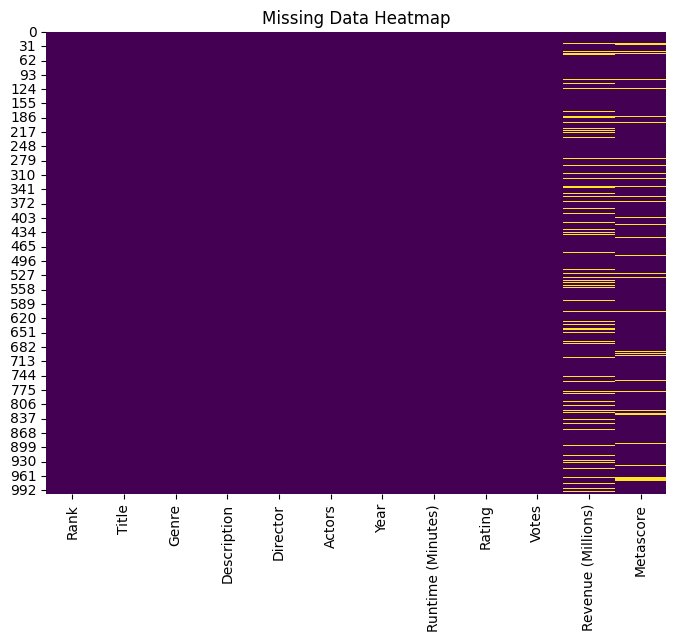

In [8]:
# Visualize missing data with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Remove rows with missing values
data_cleaned = data.dropna(axis=0)

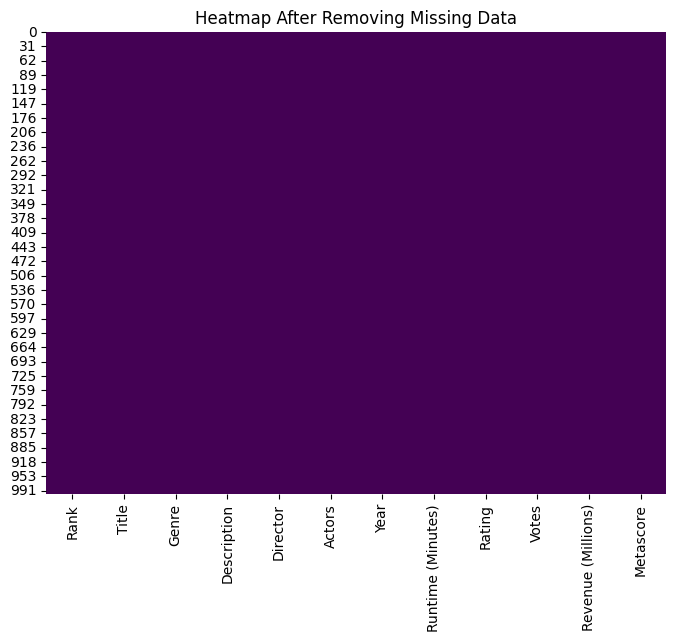

In [10]:
# Verify that missing values have been removed
plt.figure(figsize=(8,6))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap After Removing Missing Data")
plt.show()

In [11]:
# Save the cleaned dataset 
data_cleaned.to_csv("cleaned_movie_data.csv", index=False)

In [12]:
# Check for duplicate records in the dataset
duplicates = data_cleaned.duplicated().any()
print("\nAre there any duplicated values in the data?", duplicates)


Are there any duplicated values in the data? False


In [13]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(data_cleaned.describe())


Summary Statistics:
              Rank        Year  Runtime (Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          838.000000  838.000000  
mean            84.564558   59.575179  
std            104.520227   16.952416  
min              0.000000   11.000000  
25%             13.967500   47.000000  
50%             48.150000  

In [14]:
# Identify movies with a runtime of 180 minutes or more
long_movies = data_cleaned[data_cleaned['Runtime (Minutes)'] >= 180]['Title']
print("\nMovies with Runtime 180 Minutes or More:")
print(long_movies)


Movies with Runtime 180 Minutes or More:
82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object


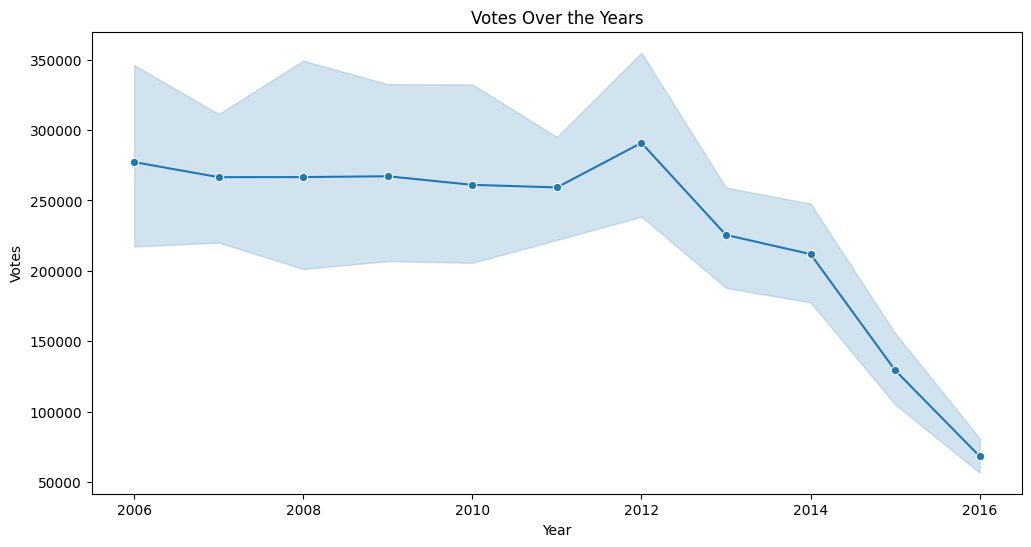

In [15]:
# Create a line plot to show the trend of votes over the years
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Votes', data=data_cleaned, marker='o')
plt.title("Votes Over the Years")
plt.xlabel('Year')
plt.ylabel('Votes')
plt.show()

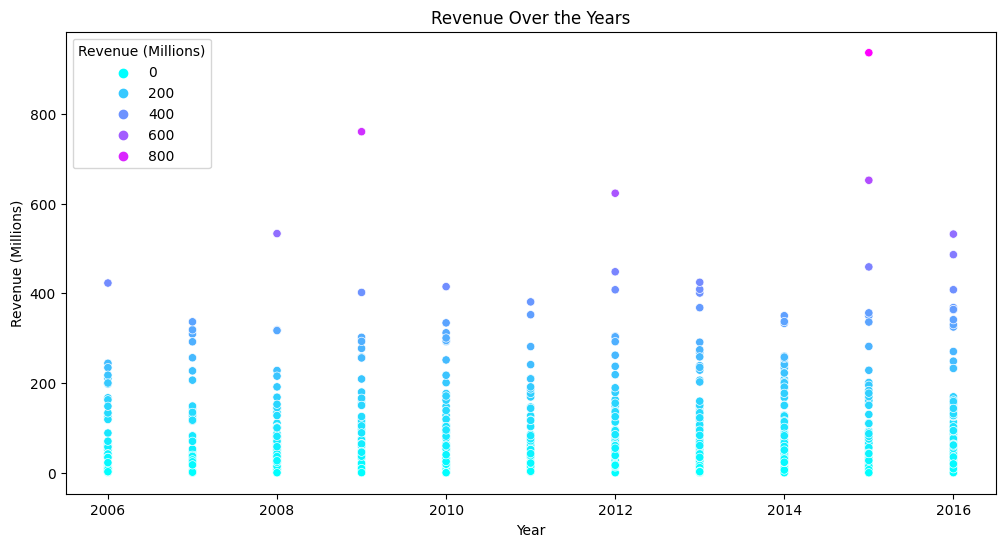

In [16]:
# Create a scatter plot to visualize the relationship between Year and Revenue
plt.figure(figsize=(12,6))
sns.scatterplot(x='Year', y='Revenue (Millions)', data=data_cleaned, hue='Revenue (Millions)', palette='cool')
plt.title("Revenue Over the Years")
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.show()

In [17]:
# Calculate the average rating per director and sort in descending order
average_rating_director = data_cleaned.groupby('Director')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Director:")
print(average_rating_director)


Average Rating by Director:
Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64


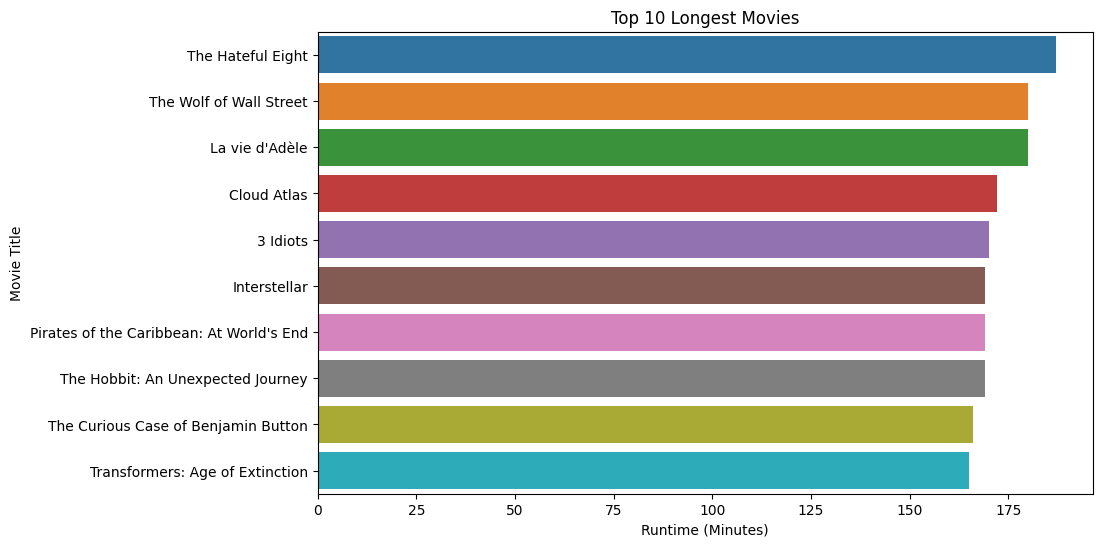

In [18]:
# Select the top 10 longest movies by runtime
top_10_longest_movies = data_cleaned.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')

# Plot a horizontal bar plot for the top 10 longest movies
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_longest_movies['Runtime (Minutes)'], y=top_10_longest_movies.index)
plt.title('Top 10 Longest Movies')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movie Title')
plt.show()

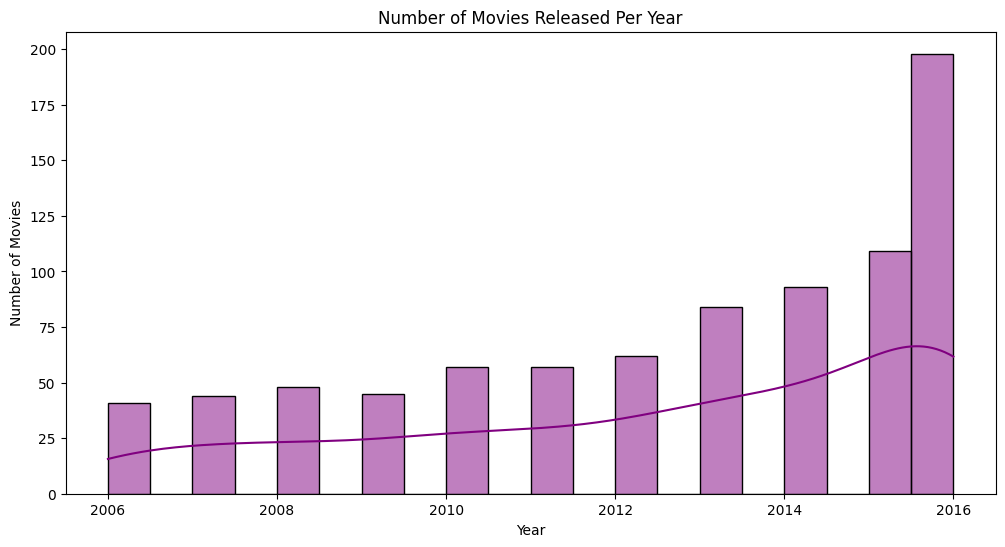

In [19]:
# Count the number of movies produced each year using a bar plot
plt.figure(figsize=(12,6))
sns.histplot(data=data_cleaned, x='Year', bins=20, kde=True, color='purple')
plt.title("Number of Movies Released Per Year")
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [20]:
# Find the movie with the highest revenue
highest_revenue_movie = data_cleaned.loc[data_cleaned['Revenue (Millions)'].idxmax()]['Title']
print("\nMovie with the Highest Revenue:")
print(highest_revenue_movie)


Movie with the Highest Revenue:
Star Wars: Episode VII - The Force Awakens


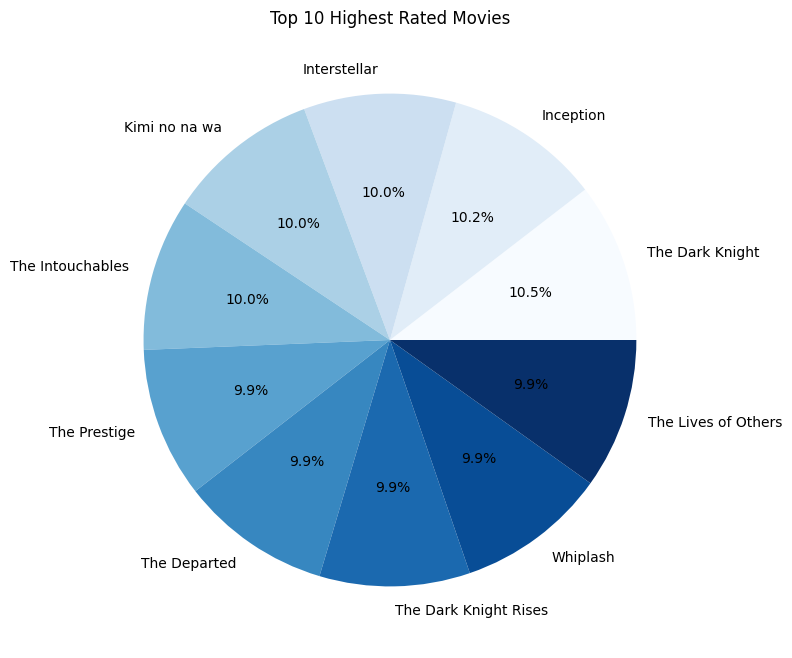

In [21]:
# Select the top 10 highest-rated movies
top_10_highest_rated = data_cleaned.nlargest(10, 'Rating')[['Title', 'Rating', 'Director']].set_index('Title')

# Create a pie chart for the top 10 highest-rated movies
plt.figure(figsize=(8,8))
top_10_highest_rated['Rating'].plot.pie(autopct='%1.1f%%', cmap='Blues', title="Top 10 Highest Rated Movies")
plt.ylabel('')
plt.show()

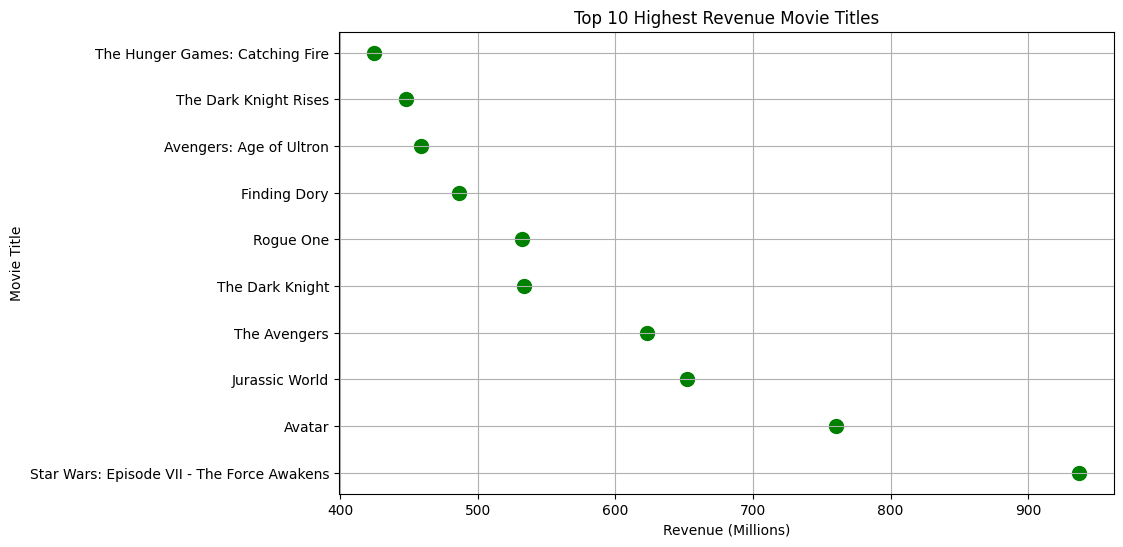

In [22]:
# Display the top 10 movies by revenue using a bar plot
top_10_highest_revenue = data_cleaned.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')

# Create a dot plot for the top 10 highest revenue movies
plt.figure(figsize=(10,6))
plt.scatter(top_10_highest_revenue['Revenue (Millions)'], top_10_highest_revenue.index, color='green', s=100)
plt.title("Top 10 Highest Revenue Movie Titles")
plt.xlabel('Revenue (Millions)')
plt.ylabel('Movie Title')
plt.grid(True)
plt.show()

In [23]:
# Calculate the average rating by year and sort by rating
avg_rating_by_year = data_cleaned.groupby('Year')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Year:")
print(avg_rating_by_year)


Average Rating by Year:
Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64


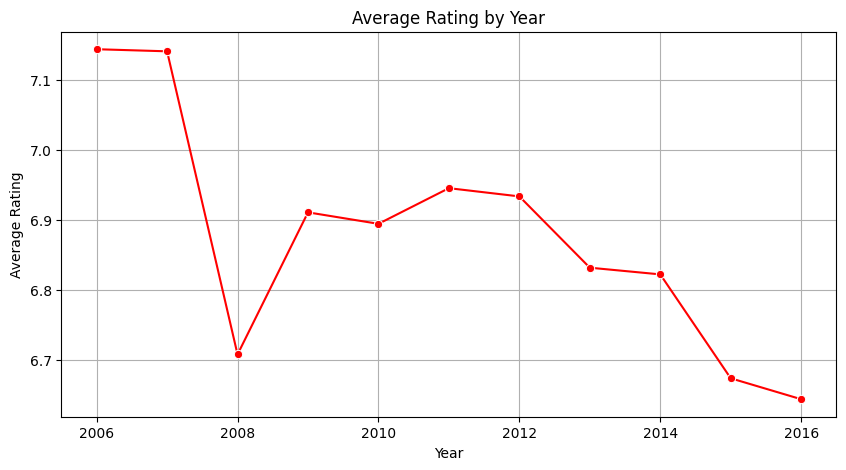

In [24]:
# Visualize average rating per year using a line plot
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values, marker='o', color='red')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

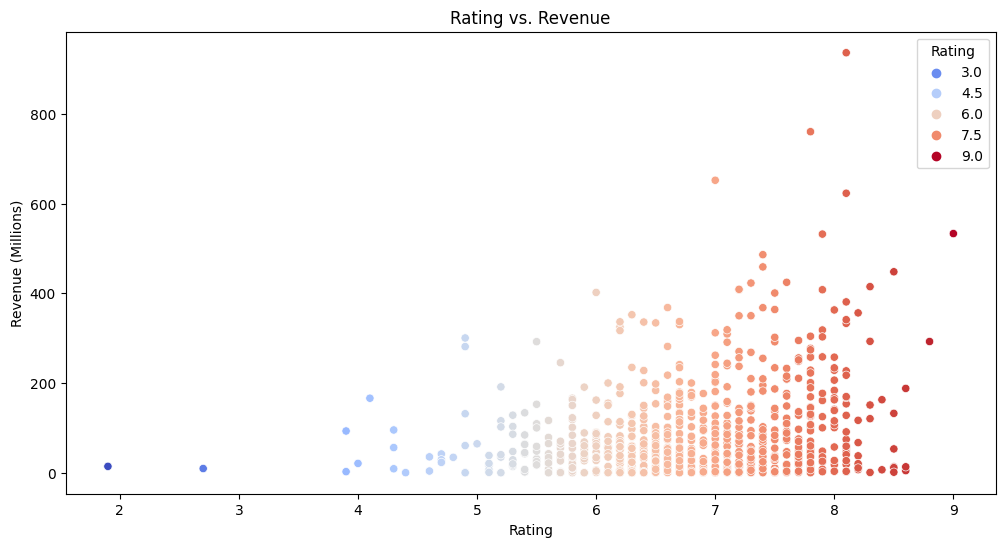

In [25]:
# Scatter plot showing the relationship between Rating and Revenue
plt.figure(figsize=(12,6))
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=data_cleaned, hue='Rating', palette='coolwarm')
plt.title("Rating vs. Revenue")
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.show()